# Milestone 1

`Gege Mayrendra`

`Batch-004-HCK Data Science`


### LINK TABLEU

`https://public.tableau.com/views/Milestione-Gege/VISUALISASI?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link`

## Background

`Airbnb (ABNB) is an online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in specific locales. The company has come a long way since 2007, when its co-founders first came up with the idea to invite paying guests to sleep on an air mattress in their living room. According to Airbnb's latest data, it has in excess of six million listings, covering more than 100,000 cities and towns and 220-plus countries worldwide. Now we have a dataset of Airbnb in new York City and want to know its relation between each for neighbourhood,price and availbility.`

## Problem Statement

`Finding out where is the best place to stay from Airbnb application in New York City and their comparison of each neighbourhood as group`

## Problem Points
    1. How many room types based on provider airbnb in New York City
    2. Who is the most favorite host in NYC?
    3. How the distribution of room type cross with neighbourhood airbnb in NYC?
    4. does the neighbourhood in Midtown Manhattan sucessfully hook the traveller to give a review?
    5. Is there a similiarity between Manhattan airbnb and Brooklyn airbnb?
    6. Which in New York City are more costly?

## Working Area

### Data Loading
`Importing data that we use during our project along with the library`

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew
import urllib

`first of all, we need to reading our dataset and assigning into df variable, at this moment we also using function to separate the possibility missing value in dataset`

In [3]:
df = pd.read_csv('AB_NYC_2019.csv',na_values=[" ", "-", "?" ,"n/a", "na", "--"])

### Data Exploration

`we need to know how many rows and columns in this data set`

In [4]:
df.shape

(48879, 13)

`with df.shape, we know our dataset has 48895 rows and 14 columns`

`now we should look at the data head and tail to confirm each row and columns`

In [5]:
df.head(5)

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [6]:
df.tail(5)

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
48874,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9
48875,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36
48876,36485431,Sunny Studio at Historical Neighborhood,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27
48877,36485609,43rd St. Time Square-cozy single bed,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6,2
48878,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,1,23


`we might not getting satisfied with head and tail, and need to see the sample in a random way so we use df.sample instead`

In [7]:
df.sample(10)

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
11722,9117817,CLASSY BROWNSTONE FOR UP TO 5!! Fee for extra ...,46644337,Brooklyn,Bedford-Stuyvesant,40.68357,-73.94126,Entire home/apt,149,2,26,3,360
11378,8845951,Cozy & Private Harlem Bedroom,4035773,Manhattan,Harlem,40.80769,-73.95497,Private room,70,1,76,1,293
44480,34258598,Single Bedroom around Columbia University,195863013,Manhattan,Upper West Side,40.80249,-73.96729,Private room,45,3,3,1,2
42001,32644251,4-bedroom Haven in Ridgewood,7335887,Queens,Glendale,40.69991,-73.89488,Entire home/apt,190,4,7,2,70
46778,35448444,1BEAUTIFUL ROOM WITH AIR CONDITION SHEEPSHEAD BAY,102292061,Brooklyn,Sheepshead Bay,40.58625,-73.94591,Private room,50,1,8,3,75
48590,36339442,Spacious Sun-Filled Artist Oasis,236187116,Brooklyn,Bushwick,40.69780,-73.92589,Private room,75,1,0,2,18
12024,9364750,Feel at home.,48592068,Manhattan,Washington Heights,40.84864,-73.94046,Private room,75,1,0,1,1
21590,17317366,Manhattan Midtown Vacation Home away from Home,116870039,Manhattan,Kips Bay,40.74511,-73.97780,Entire home/apt,200,3,72,1,249
40821,31720275,Suite Escape - Modern & Chic 1 Bedroom,208930169,Brooklyn,Canarsie,40.63028,-73.90121,Entire home/apt,110,2,0,1,353
6342,4629870,"Super Quiet, Private Patio",16437254,Brooklyn,Boerum Hill,40.68851,-73.98655,Entire home/apt,130,30,3,21,312


`to know our data better, we need to look the info of the data in general using df.info()`

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48879 entries, 0 to 48878
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48879 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48879 non-null  int64  
 3   neighbourhood_group             48879 non-null  object 
 4   neighbourhood                   48879 non-null  object 
 5   latitude                        48879 non-null  float64
 6   longitude                       48879 non-null  float64
 7   room_type                       48879 non-null  object 
 8   price                           48879 non-null  int64  
 9   minimum_nights                  48879 non-null  int64  
 10  number_of_reviews               48879 non-null  int64  
 11  calculated_host_listings_count  48879 non-null  int64  
 12  availability_365                

### Data Cleaning

`after we see the df.info(), we got an insight there might be a missing value in our data set, and we take an action to solve the missng value`

In [9]:
df.drop(columns=['last_review', 'reviews_per_month','host_name'], inplace=True)

KeyError: "['last_review', 'reviews_per_month', 'host_name'] not found in axis"

`the reasons why i dropped the last_review and reviews_per_month was because i feel like will not using those coloumns for my next data exploration and processing. and i also dropped host_name simply because i think we dont need the host name because they belongs to actual humans and it doesnt give any information to us`

`now we need to check the missing value in all of the columns to see our action before`

In [ ]:
df.isnull().sum()

id                                 0
name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

`we realized there are 16 missing values in name column, so we use dropna.subset columns to erase the rows with these missing value without actually dropping the whole columns`

In [ ]:
df.dropna(subset=['name'],inplace=True)

`data cleaning almost done, next we will check all the columns using df.info and df.isnull`

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48879 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48879 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48879 non-null  int64  
 3   neighbourhood_group             48879 non-null  object 
 4   neighbourhood                   48879 non-null  object 
 5   latitude                        48879 non-null  float64
 6   longitude                       48879 non-null  float64
 7   room_type                       48879 non-null  object 
 8   price                           48879 non-null  int64  
 9   minimum_nights                  48879 non-null  int64  
 10  number_of_reviews               48879 non-null  int64  
 11  calculated_host_listings_count  48879 non-null  int64  
 12  availability_365                

In [ ]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

`To ensure our data is properly structured, we want to make sure that there are no other standard missing values by looping through our dataframe to find the missing values`

In [ ]:
#checking the columns from missing value
miss_vals = {}

for i in list(df.columns):
    miss_vals[i] = 0
    for n in df[i]:
        if n in ['N/A', '--', '-', 'Null']:
            miss_vals[i] = miss_vals[i] + 1
miss_vals

{'id': 0,
 'name': 0,
 'host_id': 0,
 'neighbourhood_group': 0,
 'neighbourhood': 0,
 'latitude': 0,
 'longitude': 0,
 'room_type': 0,
 'price': 0,
 'minimum_nights': 0,
 'number_of_reviews': 0,
 'calculated_host_listings_count': 0,
 'availability_365': 0}

`this is the end of data cleaning, and we confident enough there are no missing value left in our data`

## Discussion 1
- **How many room types based on provider airbnb in New York City?**

`we might wondering shich type room usually available in New York City in airbnb, so we need to explore how many room types devided registered host id in airbnb`

In [ ]:
most_room = df.groupby(df['room_type']).count()['host_id'].sort_values(ascending = False)
most_room

room_type
Entire home/apt    25402
Private room       22318
Shared room         1159
Name: host_id, dtype: int64

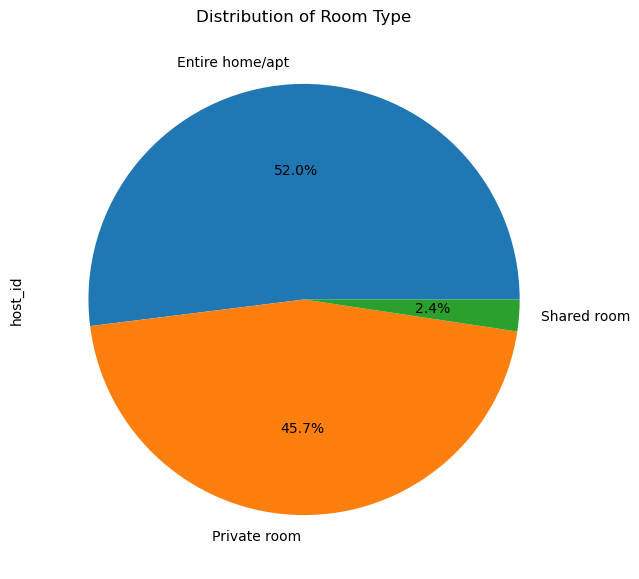

In [ ]:
most_room.plot.pie(subplots=True,autopct='%1.1f%%', figsize=(12, 7))
plt.title("Distribution of Room Type")
plt.show()

### Insight Dicussion 1
`from chat above, we now know that basically all the airbnb room in New York concentrated in 2 sectors which is private room at 45.7% and entire home/apartment at 52.0%. shared room only give 2.4% at all the population in distribution of room type in New York City`

## Discussion 2
- **Who is the most favorite host in NYC?**

`in our data, there are many host id appears more that once, this information give us an assumtion that these host id have a nice room or nice view so we take top 10 host id in dataset`

In [ ]:
most_fav=df.host_id.value_counts().head(10)
most_fav

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
1475015       52
Name: host_id, dtype: int64

<AxesSubplot:title={'center':'Most Favorite Hoster'}, ylabel='Hoster'>

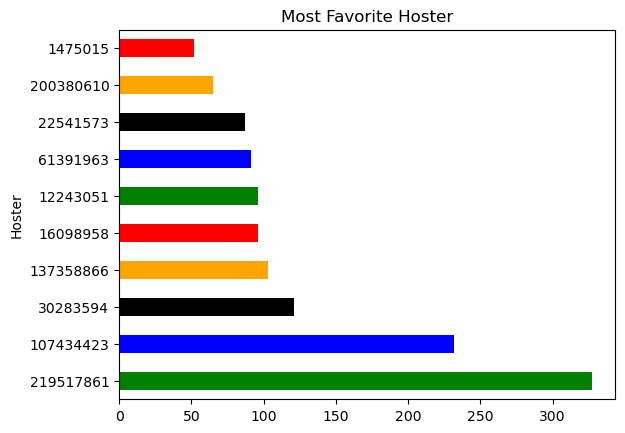

In [ ]:
most_fav.plot(kind='barh', xlabel = 'Hoster', ylabel = 'frequency', title = 'Most Favorite Hoster', 
color = ('green', 'blue','black', 'orange','red','green', 'blue','black','orange','red'))

### Insight discussion 2
`from this bar chart, host id 219517861 is the most favorite airbnb in new york city with 327 appearance along with host id 107434423 as a second most favorite highest airbnb with 232 appearance. the third until 10th host id has similiarity appearance of data `

## Discussion 3
- **How the distribution of room type cross with neighbourhood airbnb in NYC?**

`New York airbnb has more than 200 neighbourhood and curios about the distribution of room type in each neighbourhood. so we called top 10 neighbourhood in New York City`

In [ ]:
df.neighbourhood.value_counts().head(10)

Williamsburg          3918
Bedford-Stuyvesant    3713
Harlem                2657
Bushwick              2463
Upper West Side       1970
Hell's Kitchen        1957
East Village          1852
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

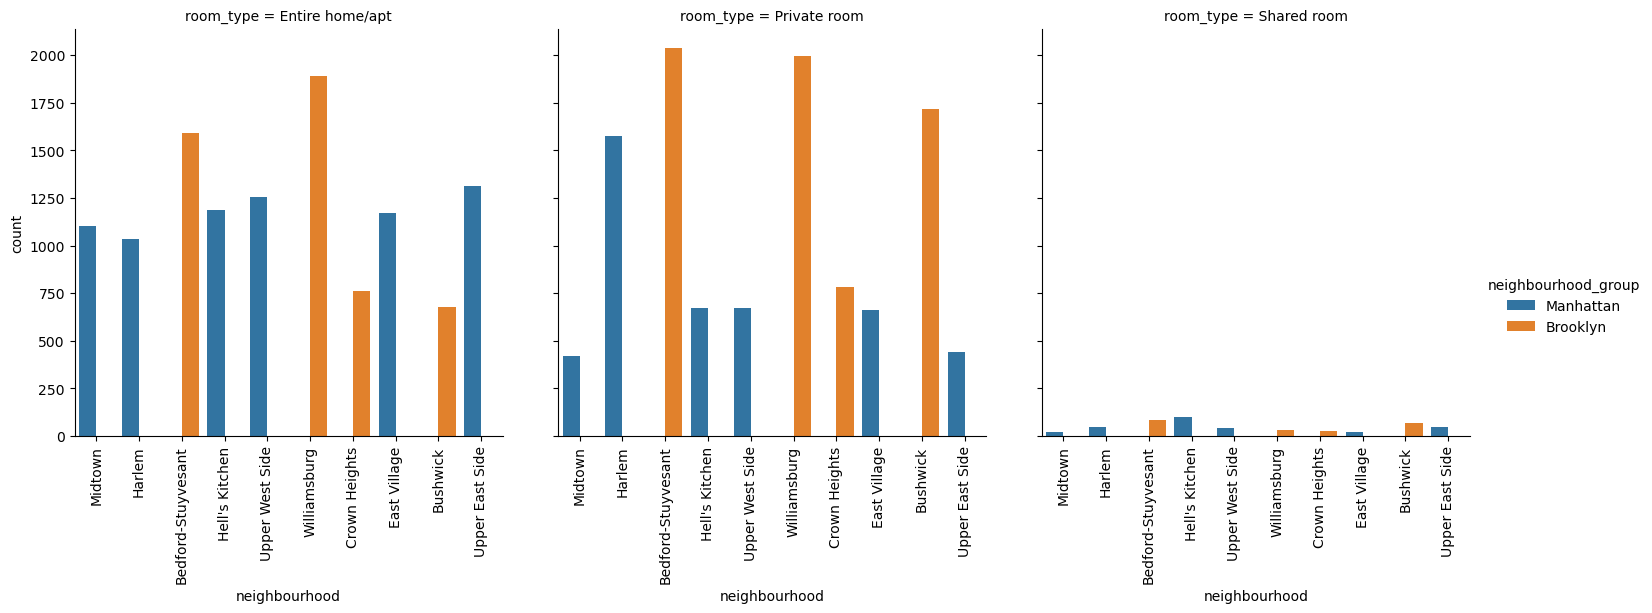

In [ ]:
neighbourhoodRT =df.loc[df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]

#using catplot to represent multiple interesting attributes together and a count
visualNRT=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=neighbourhoodRT, kind='count')
visualNRT.set_xticklabels(rotation=90)

### Insight Discussion 3
`from chart above, we conclude that shared room really has a small amount even in top 10 neighbourhood, entire home/apartment or private room has dominance in the distribution of these neighbourhood. some place like Williamsburg and Bedford-Stuyvesant has balance of distribution and the other one might have dominance in entire home or private room `

## Descriptive Statistic
    - does the neighbourhood in Midtown Manhattan sucessfully hook the traveller to give a review?

`in this part, we will explore about the ratings from Midtown in Mahattan, starting to group the neighbourhood Midtown with number of reviews to look which one has the highest review`

In [ ]:
df_reviews = df[(df['neighbourhood']=='Midtown')].sort_values('number_of_reviews', ascending = False)
df_reviews

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
16535,13246804,One cozy private BR close to the mecca of shop...,4832845,Manhattan,Midtown,40.76026,-73.96590,Private room,80,1,275,1,45
15150,12093494,Midtown Sleep 6 Central Convenience,62031986,Manhattan,Midtown,40.75237,-73.98769,Entire home/apt,333,1,246,1,323
943,360400,Beautiful Room in Manhattan Loft,1386983,Manhattan,Midtown,40.74553,-73.98943,Private room,135,3,214,2,167
10263,7857185,Midtown great location private Apt,41406733,Manhattan,Midtown,40.75399,-73.96967,Entire home/apt,135,1,214,1,170
19554,15635167,Co-op Apartment in The Lombardy Hotel- 250 sq....,100829279,Manhattan,Midtown,40.76195,-73.97148,Entire home/apt,210,1,202,3,211
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36871,29308138,San Carlos Hotel Executive Junior Suite - up to 4,173685298,Manhattan,Midtown,40.75484,-73.97235,Private room,375,1,0,11,179
15047,12002288,Luxury 1-Bedroom NYC apt. near Rockefeller Cen...,30283594,Manhattan,Midtown,40.76497,-73.98201,Entire home/apt,239,30,0,121,351
36958,29384404,Prime Location 34th&6th! Doorman Gym Deck 5231,16098958,Manhattan,Midtown,40.74829,-73.98653,Entire home/apt,180,30,0,96,342
36977,29393117,Massive Art Loft - Best Manhattan Location Ever!,220574429,Manhattan,Midtown,40.74549,-73.99066,Entire home/apt,670,25,0,3,305


`from the data above, we can mathematically calculate each mean, median, mode etc (central tendency) to analysis deeper the relation between location to number of review`

In [ ]:
print('Mean :', df_reviews['number_of_reviews'].mean())
print('Median :', df_reviews['number_of_reviews'].median())
print('Mode :', df_reviews['number_of_reviews'].mode()[0])
print('Minimum :', df_reviews['number_of_reviews'].min())
print('Max :', df_reviews['number_of_reviews'].max())
print('Standard Deviation :', df_reviews['number_of_reviews'].std())

Mean : 12.585113268608414
Median : 2.0
Mode : 0
Minimum : 0
Max : 275
Standard Deviation : 30.37416769585201


`the calculation of central tendency give us the conclusion that there is a huge differences from the max value(275) till the minimum value(0), the mean/average people tend to give a review is only 12.5, pretty high standard deviation which is 30.3 and 0 mode. this information give the information that people dont usually give a review at many airbnb or those 0 reviews airbnb is empty all the time` 

In [ ]:
df_reviews['number_of_reviews'].skew()

4.04916880518224

`after checking the skew of number of reviews, we know that the data tend to be right skew, but this is fine because we need all the data for our analysis to make the calculation real from reality situation`

## Inferential Statistic

### Hypothesis Testing
`in this hypothesis testing, we use two sample two tail hypothesis. the reason why we use this method because we use 2 data and we want to make 2 decision based on the data from the dataset`

`So as we can see below we used the t - test 2 sample 2 tailed with the declaration as follows :`

`- H0 : &mu; mean of Manhattan airbnb price = &mu; mean of Brooklyn airbnb price`

`- H1 : &mu; mean of Manhattan airbnb price != &mu; mean of Brooklyn airbnb price`

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48879 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48879 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48879 non-null  int64  
 3   neighbourhood_group             48879 non-null  object 
 4   neighbourhood                   48879 non-null  object 
 5   latitude                        48879 non-null  float64
 6   longitude                       48879 non-null  float64
 7   room_type                       48879 non-null  object 
 8   price                           48879 non-null  int64  
 9   minimum_nights                  48879 non-null  int64  
 10  number_of_reviews               48879 non-null  int64  
 11  calculated_host_listings_count  48879 non-null  int64  
 12  availability_365                

In [ ]:
# importing table of dropoff site
df.groupby('neighbourhood_group')[['price']].agg(['mean','median','count'])

price              
                           mean median  count
neighbourhood_group                          
Bronx                 87.457798   65.0   1090
Brooklyn             124.395711   90.0  20098
Manhattan            196.877425  150.0  21652
Queens                99.517649   75.0   5666
Staten Island        114.812332   75.0    373

In [ ]:
mahalbuset = df.groupby(df['neighbourhood_group']).mean()['price'].sort_va66lues(ascending = False)
mahalbuset

neighbourhood_group
Manhattan        196.877425
Brooklyn         124.395711
Staten Island    114.812332
Queens            99.517649
Bronx             87.457798
Name: price, dtype: float64

## Discussion 4
`we might want to know which neighbourhood_group that cost more than other, we can find the answer by called the neighbourhood and mean of price from the neighbourhood group of New York City`

<AxesSubplot:title={'center':'price variance'}, xlabel='neighbourhood_group', ylabel='price'>

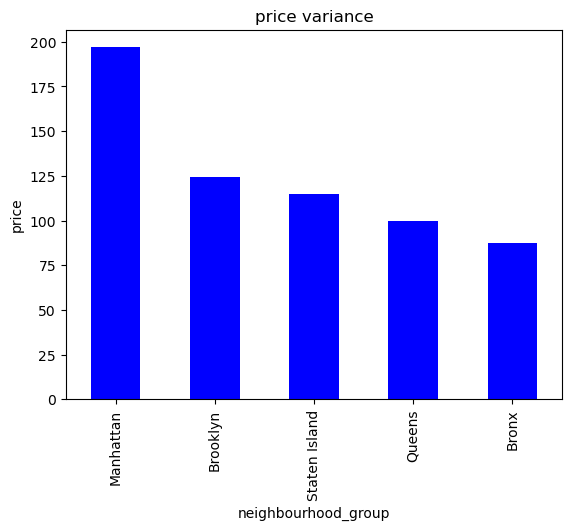

In [ ]:
mahalbuset.plot(kind='bar', xlabel = 'neighbourhood_group', ylabel = 'price', title = 'price variance', color = 'blue')

### Insight Discussion 4
`we conclude that Manhattan cost more money because its average price is 196 USD and the lowest is Bronx with average price is 87 USD`

In [ ]:
Brooklyn = df[df['neighbourhood_group'] == 'Brooklyn']
Brooklyn

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
6,5121,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,1,0
12,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,3,314
15,6848,Only 2 stops to Manhattan studio,15991,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140,2,148,1,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48882,36482231,Bushwick _ Myrtle-Wyckoff,66058896,Brooklyn,Bushwick,40.69652,-73.91079,Private room,40,20,0,1,31
48884,36482783,Brooklyn Oasis in the heart of Williamsburg,274307600,Brooklyn,Williamsburg,40.71790,-73.96238,Private room,190,7,0,1,341
48887,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,0,3,365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9


In [ ]:
Manhattan = df[df['neighbourhood_group'] == 'Manhattan']
Manhattan

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,1,129
7,5178,Large Furnished Room Near B'way,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,1,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48886,36483010,Comfy 1 Bedroom in Midtown East,274311461,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,6,0,1,176
48888,36484087,"Spacious Room w/ Private Rooftop, Central loca...",274321313,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,1,31
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6,2


In [ ]:
t_stat, p_val = stats.ttest_ind(Manhattan['price'], Brooklyn['price'])
print('P-value:',p_val) 
print('t-statistics:',t_stat)

P-value: 1.3765622990778747e-195
t-statistics: 29.99486321954741


`plotting our t-test`

-374.3256642606548


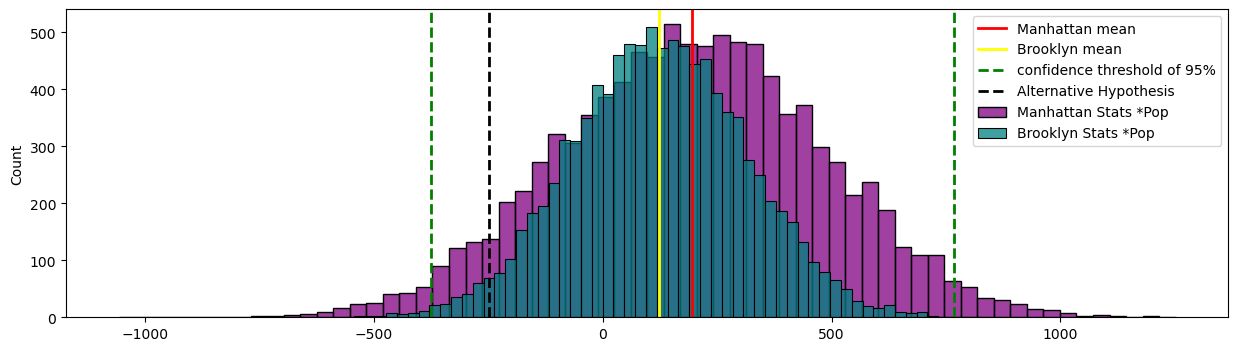

In [ ]:
# simulation using random generated numbers
pmanhattan = np.random.normal(Manhattan['price'].mean(), Manhattan['price'].std(), 10000)
pbrooklyn = np.random.normal(Brooklyn['price'].mean(), Brooklyn['price'].std(), 10000)

# confidence interval based on Manhattan
# used cv = 0.05 since 2 tailed, we use 0.95 as it is.
ci = stats.norm.interval(0.95, loc=Manhattan['price'].mean(), scale=Manhattan['price'].std())

plt.figure(figsize=(15,4))
sns.histplot(pmanhattan, label='Manhattan Stats *Pop', color='purple')
sns.histplot(pbrooklyn, label='Brooklyn Stats *Pop', color='teal')

# mean
plt.axvline(pmanhattan.mean(), color='red', linewidth=2, label='Manhattan mean')
plt.axvline(pbrooklyn.mean(), color='yellow', linewidth=2, label='Brooklyn mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

# alternative hypothesis
t_stat = stats.t.ppf(0.975, df=9999) # two-tailed t-value with 9999 degrees of freedom and alpha = 0.05

plt.axvline(pbrooklyn.mean()-t_stat*pbrooklyn.std(), color='black', linestyle='dashed', linewidth=2, label='Alternative Hypothesis')

plt.legend()
print(ci[0])


`From the results of our T - test above 0.05 we can conclude on the given data that our hypothesis is we reject the H0 which means that the average price of airbnb in Manhattan is not the same as airbnb Brooklyn population, or in another language there is a Significant Difference between the average price of Manhattan airbnb and the average price of Brooklyn airbnb.`

In [ ]:
df.head(2)

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355


## Visualize to tableu

In [ ]:
df.to_csv('AB_NYC_MS_2019.csv', index=False)

## Overall Analysis
    1. airbnb room in New York concentrated in 2 sectors which is private room at 45.7% and entire home/apartment at 52.0%. shared room only give 2.4% at all the population in distribution of room type in New York City

    2. host id 219517861 is the most favorite airbnb in new york city with 327 appearance along with host id 107434423 as a second most favorite highest airbnb with 232 appearance. the third until 10th host id has similiarity appearance of data

    3. shared room really has a small amount even in top 10 neighbourhood, entire home/apartment or private room has dominance in the distribution of these neighbourhood. some place like Williamsburg and Bedford-Stuyvesant has balance of distribution and the other one might have dominance in entire home or private room

    4. this information give the information that people dont usually give a review at many airbnb or those 0 reviews airbnb is empty all the time

    5. Manhattan cost more money because its average price is 196 USD and the lowest is Bronx with average price is 87 USD

    6. there is a Significant Difference between the average price of Manhattan airbnb and the average price of Brooklyn airbnb

    7. from all the conclusion above, we might think manhattan is the best place to stay in airbnb, eventho its more expensive than the other one, but it has more distribution of room type and a lot of reviews. this is indicate a good service and choices.